# Sign Language MNIST Classifier: Sequential Deep Learning and CNN Model



## **Objective**

### Question

You are required to use the Sign Language MNIST dataset to correctly identify the sign that represents a specific character. You will find the train and test data in CSV format under modules/"sign_language_data". The American Sign Language letter database of hand gestures represents a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. 

Create an IPython notebook that provides the following:

1. Build a Sequential Deep Learning model that predicts the test data. Experiment with the hyperparameters until you are unable to increase the accuracy of your model. Your solution should include the learning curves (training loss vs test loss and training accuracy vs test accuracy).

2. Build a Convolutional Neural Network model that predicts the test data. Experiment with the hyperparameters until you are unable to increase the accuracy of your model. Your solution should include the learning curves (training loss vs test loss and training accuracy vs test accuracy).

3. Use data augmentation techniques to the previous model to see if you can improve the accuracy. As with the first two models, show the learning curves.



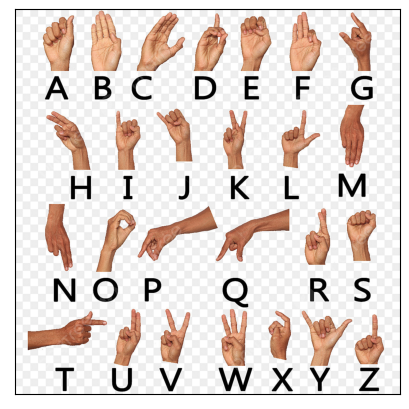

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

credit_card_image=np.array(mpimg.imread('asl.jpg'))
fig, ax=plt.subplots(figsize=(5,5))
                          
ax.imshow(credit_card_image)
ax.set(xticks=[],yticks=[])   
plt.show()

# **MNIST  Classification using Sequential Deep learning model & CNN model**

In [2]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math



# The below code can be used to ignore the warnings that may occur due to deprecations
import warnings
warnings.filterwarnings("ignore")

In [3]:
import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras import layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Load Data


In [4]:
train_df=pd.read_csv('sign_mnist_train.csv')
test_df=pd.read_csv('sign_mnist_test.csv')

### Check data shape

In [5]:
train_df.shape

(27455, 785)

In [6]:
test_df.shape

(7172, 785)

In [7]:
print(train_df.columns)
print(test_df.columns)

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)
Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


### Data Visualization

In [8]:
def to_image(array, label=True):
    # Reshape an array into an image format
    array = np.array(array)
    start_idx = 1 if label else 0
    return array[start_idx:].reshape(28, 28).astype(float)


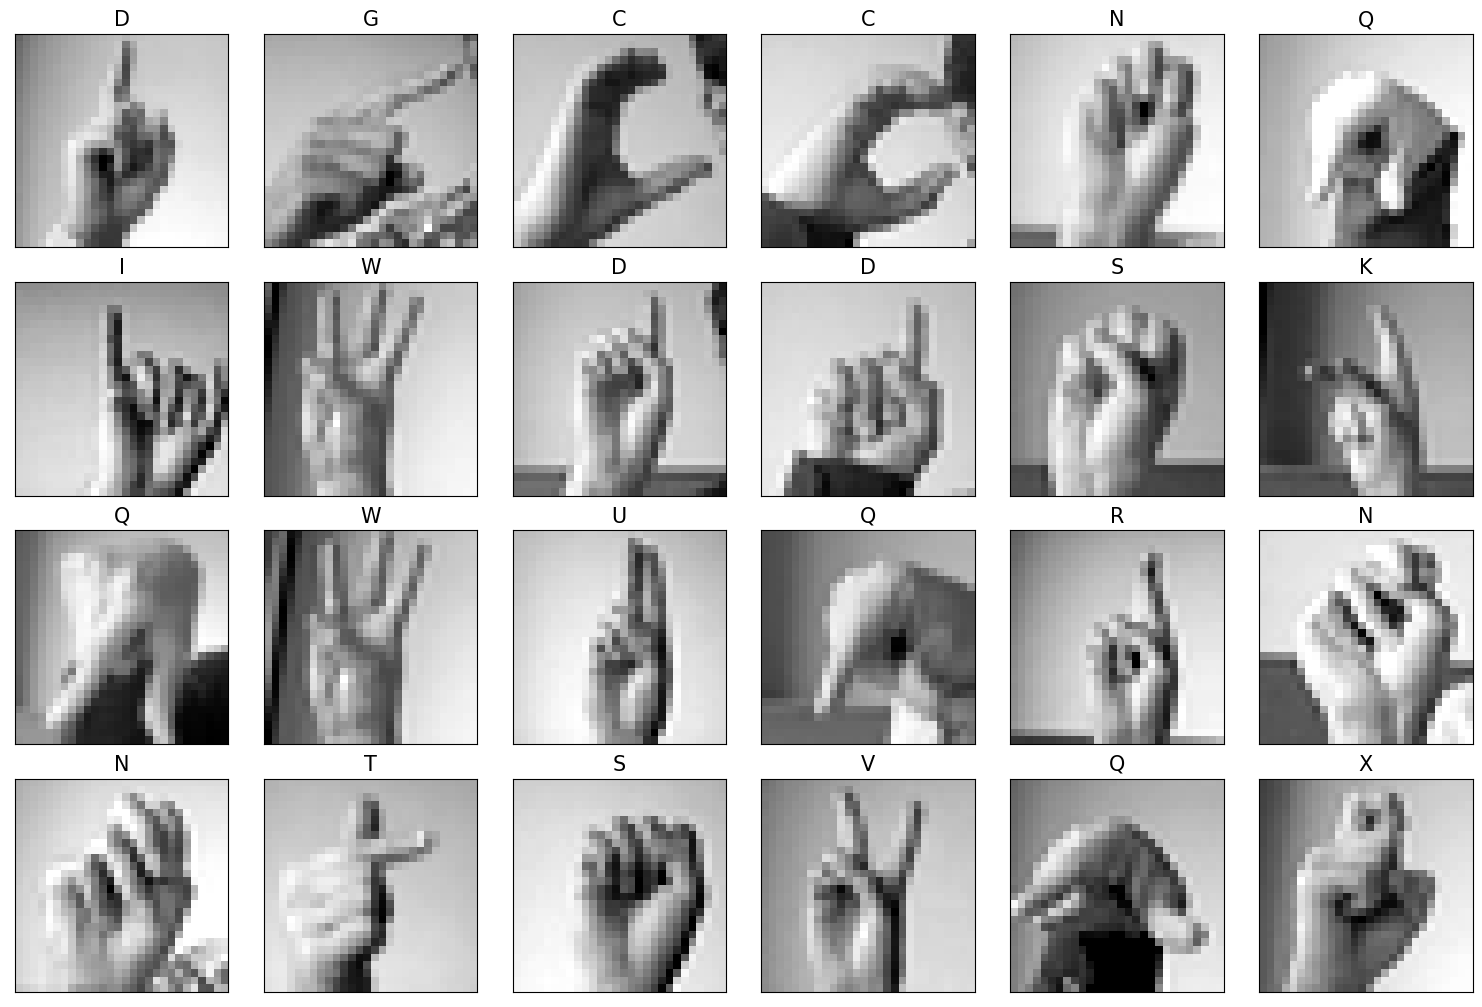

In [9]:
mapping_letter = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I',
                  10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R',
                  18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y'}


# Display some images from the dataset
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(15, 10),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img = to_image(train_df.iloc[i])
    ax.imshow(img, cmap='gray')
    title = mapping_letter[train_df.label.iloc[i]]
    ax.set_title(title, fontsize=15)

plt.tight_layout(pad=0.5)
plt.show()


### Split Data

In [10]:
# Split the data into features (X) and target (y) variables
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values


In [11]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


### Distribution of labels in target

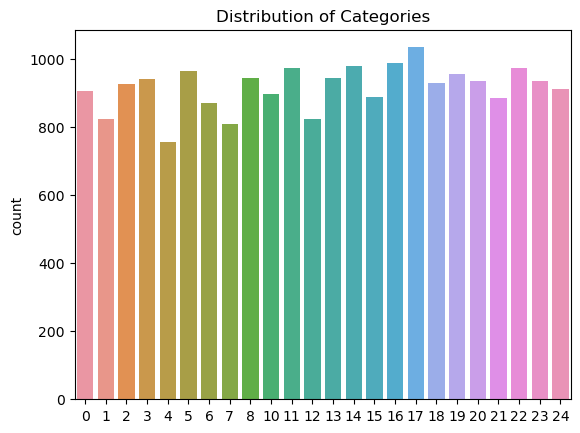

In [12]:
count_plot = sns.countplot(x=y_train)
count_plot.set(title="Distribution of Categories")
plt.show()


### Evaluation Metric

We observe that **the dataset appears to be quite balanced**, with each category having approximately the same number of images. 

So **accuracy should be a good evaluation metric** for the model performance in this case study.

## **Data Preparation**

In the data preparation stage,**we normalize the feature inputs.**

Normalization is highly recommended as it has the following benefits when training a neural network model:

1. **Normalization makes the training faster and reduces the chances of getting stuck at a local optima.**
3. **Weight decay and estimation can be done more conveniently** with normalized inputs.
4. In deep neural networks, **normalization helps to avoid the Vanishing/Exploding gradient problem** The Vanishing/Exploding gradient problem occurs when very small or very large error gradients accumulate, and that results in either extremely small or very large updates to neural network model weights during the training process. This makes a model unstable and unable to learn from the training data.

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [13]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

In [14]:
X_test_normalized.shape

(7172, 784)

In [15]:
X_val_normalized.shape

(5491, 784)

In [16]:
X_train_normalized.shape

(21964, 784)

Since this is a **multi-class classification problem**, **the output layer should have 24 neurons** which will provide us with the probabilities of the input image belonging to each of those 24 classes. Therefore, we also need to create an **encoded representation for the target classes.**

In [17]:
from sklearn.preprocessing import LabelBinarizer
label_bin=LabelBinarizer()

y_train_encoded = label_bin.fit_transform(y_train)
y_val_encoded = label_bin.fit_transform(y_val)
y_test_encoded = label_bin.fit_transform(y_test)

In [18]:
# Creating one-hot encoded representation of target labels
# using to_categorical() function 

# import tensorflow as tf
# y_train_encoded = tf.keras.utils.to_categorical(y_train)
# y_val_encoded = tf.keras.utils.to_categorical(y_val)
# y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [19]:
y_train_encoded.shape


(21964, 24)

In [20]:
y_test_encoded.shape

(7172, 24)

In [21]:
y_val_encoded.shape

(5491, 24)

## **Model Building - Sequential Deep Learning Model 1 using SGD with learning rate 0.01 and momentum 0.9 with 15 epochs**

First, let's **set the seed for the random number generators in Numpy, Python's Random package, and TensorFlow** to ensure we are able to reproduce these results every time we run the code.

In [22]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [23]:
# Define model architecture
from tensorflow.keras import layers
seq_model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(24, activation='softmax')
])


2023-04-03 20:16:23.529954: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 20:16:23.530967: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


In [24]:
# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compile model
seq_model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [25]:
# Generating the summary of the model
seq_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 24)                3096      
Total params: 103,576
Trainable params: 103,576
Non-trainable params: 0
_________________________________________________________________


**Let us understand the parameters in each layer:**



Here, the input shape to the layer is (784)


*   **Fully Connected Dense Layer**<br>
Number of neurons: 128<br>
Number of parameters: (784x128)+(1x128): 100352+128: 100480<br>
` Number of neurons in current layer x number of neurons in the previous layer + 1 x number of neurons in current layer(Bias)`<br>

*   **Output Layer**<br>
Number of neurons: 24<br>
Number of parameters: (24x128)+(1x24) = 3096<br>
` Number of neurons in current layer x number of neurons in the previous layer( Here in the previous dense layer: 100) + 1 x number of neurons in current layer(Bias)`








In [26]:
history = seq_model.fit(
            X_train_normalized, y_train_encoded,
            validation_data=(X_val_normalized, y_val_encoded),
            epochs=15,
            batch_size=128,
)


Train on 21964 samples, validate on 5491 samples
Epoch 1/15
21964/21964 [==============================] - 2s 88us/sample - loss: 2.4958 - accuracy: 0.2897 - val_loss: 1.8481 - val_accuracy: 0.4675
Epoch 2/15
21964/21964 [==============================] - 1s 59us/sample - loss: 1.5256 - accuracy: 0.5571 - val_loss: 1.3384 - val_accuracy: 0.6021
Epoch 3/15
21964/21964 [==============================] - 1s 61us/sample - loss: 1.1589 - accuracy: 0.6641 - val_loss: 1.0568 - val_accuracy: 0.7124
Epoch 4/15
21964/21964 [==============================] - 1s 58us/sample - loss: 0.9409 - accuracy: 0.7295 - val_loss: 0.8712 - val_accuracy: 0.7438
Epoch 5/15
21964/21964 [==============================] - 1s 58us/sample - loss: 0.7862 - accuracy: 0.7785 - val_loss: 0.7335 - val_accuracy: 0.7906
Epoch 6/15
21964/21964 [==============================] - 1s 60us/sample - loss: 0.6643 - accuracy: 0.8163 - val_loss: 0.6628 - val_accuracy: 0.8135
Epoch 7/15
21964/21964 [==============================] -

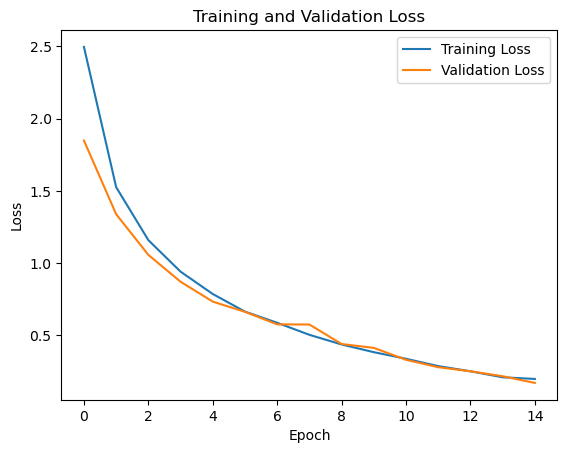

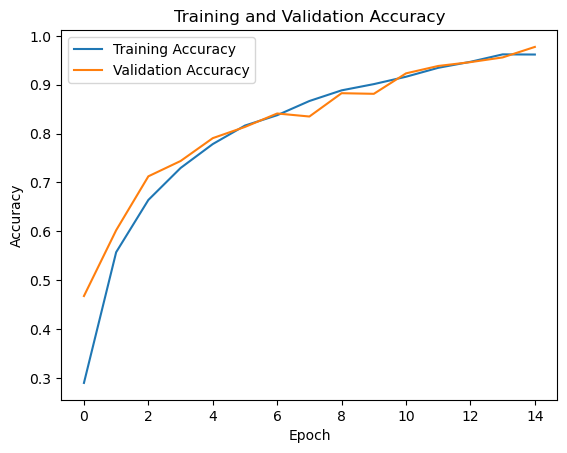

In [27]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


The model is overfitting therefore there is low test accuracy.

### **Evaluating the model on the test data**

In [28]:
test_loss1, test_acc1 = seq_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

7172/1 - 0s - loss: 0.6721 - accuracy: 0.7444


In [29]:
# Print the test loss and accuracy
print("Test Loss:", test_loss1)
print("Test Accuracy:", test_acc1)

Test Loss: 0.9311945904783876
Test Accuracy: 0.74442273


### **Generating the Predictions using the test data**

In [30]:
# Here we would get the output as probablities for each category
y_pred=seq_model.predict(X_test_normalized)

### **Plotting the Confusion Matrix**

*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects the input to be of categorical values. But the y_test_encoded is an encoded value, and y_pred has probablities. So we need to get the categorical values back from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.





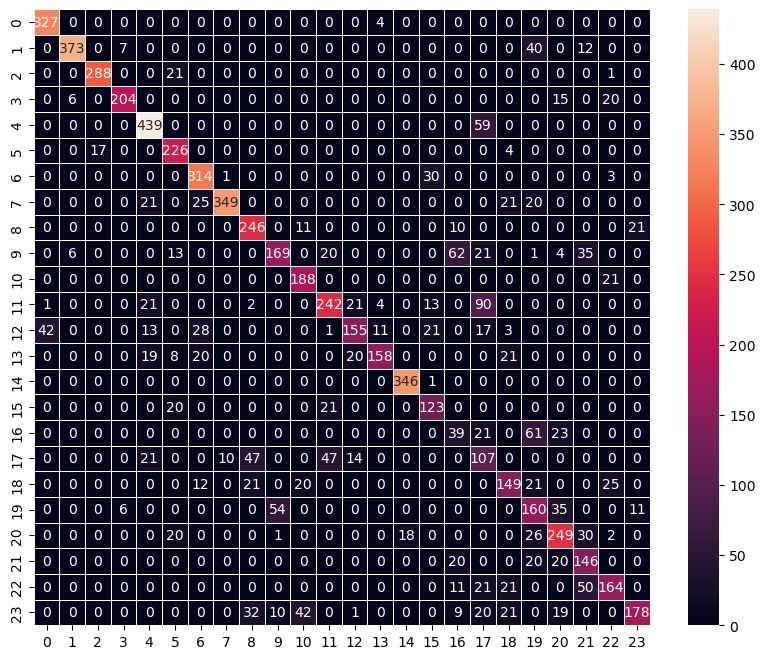

In [31]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## **Model Building - Sequential Deep Learning Model 2 using Adam with learning rate 0.001 and 30 epochs**

In [32]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [33]:
# Define model architecture
seq_model = tf.keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(24, activation='softmax')
])

# Using Adam optimizer
opt = optimizers.Adam(learning_rate=0.001)

# Compile the model
seq_model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Print the summary of the model
seq_model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                3096      
Total params: 236,952
Trainable params: 236,952
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Train the model
history = seq_model.fit(X_train_normalized, y_train_encoded,
                        validation_data=(X_val_normalized, y_val_encoded),
                        epochs=30,
                        batch_size=128)



Train on 21964 samples, validate on 5491 samples
Epoch 1/30
21964/21964 [==============================] - 3s 149us/sample - loss: 2.6158 - accuracy: 0.2056 - val_loss: 1.8712 - val_accuracy: 0.4540
Epoch 2/30
21964/21964 [==============================] - 3s 114us/sample - loss: 1.7050 - accuracy: 0.4421 - val_loss: 1.3145 - val_accuracy: 0.5871
Epoch 3/30
21964/21964 [==============================] - 3s 117us/sample - loss: 1.3557 - accuracy: 0.5484 - val_loss: 1.0523 - val_accuracy: 0.6820
Epoch 4/30
21964/21964 [==============================] - 3s 122us/sample - loss: 1.1521 - accuracy: 0.6136 - val_loss: 0.8160 - val_accuracy: 0.7510
Epoch 5/30
21964/21964 [==============================] - 3s 116us/sample - loss: 0.9875 - accuracy: 0.6619 - val_loss: 0.7042 - val_accuracy: 0.7815
Epoch 6/30
21964/21964 [==============================] - 3s 116us/sample - loss: 0.8463 - accuracy: 0.7131 - val_loss: 0.5658 - val_accuracy: 0.8275
Epoch 7/30
21964/21964 [===========================

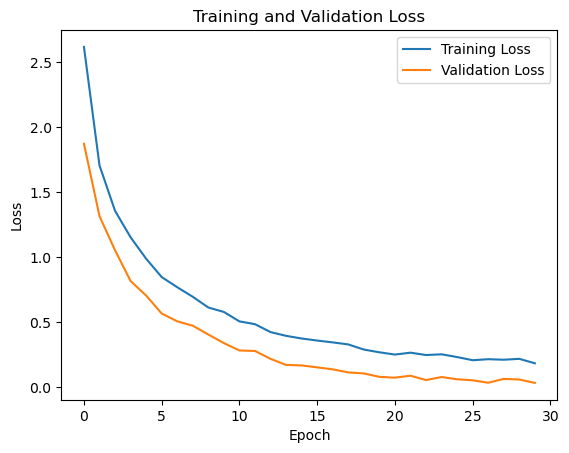

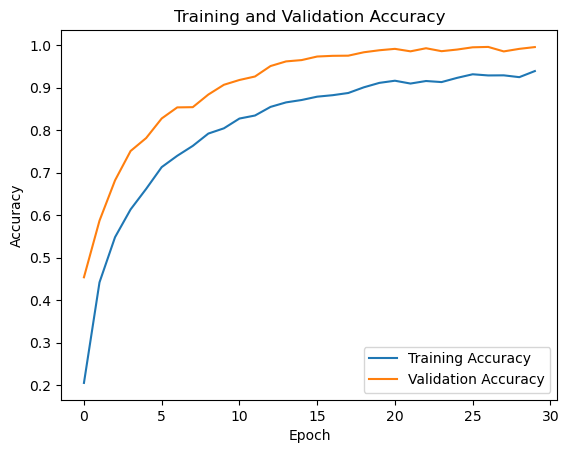

In [35]:
# Plot the learning curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
# Evaluate the model on the test set
test_loss2, test_acc2 = seq_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)
print("Test Loss:", test_loss2)
print("Test Accuracy:", test_acc2)



7172/1 - 1s - loss: 0.6224 - accuracy: 0.7777
Test Loss: 0.8450541814245861
Test Accuracy: 0.7777468


In [37]:
# Here we would get the output as probablities for each category
y_pred=seq_model.predict(X_test_normalized)

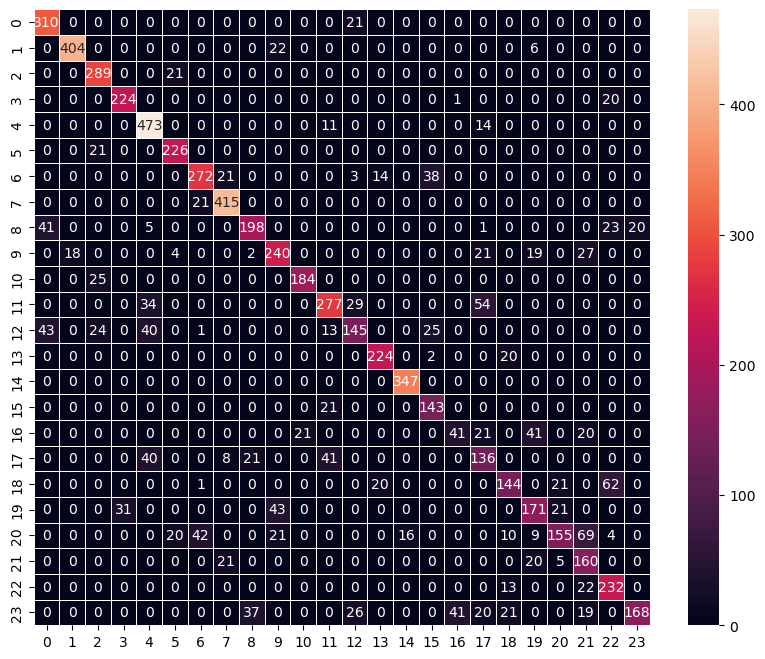

In [38]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [39]:
# Convert one-hot encoded labels to class labels
y_test_classes = np.argmax(y_test_encoded, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1-score for each class label
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1score, _ = precision_recall_fscore_support(y_test_classes, y_pred_classes)

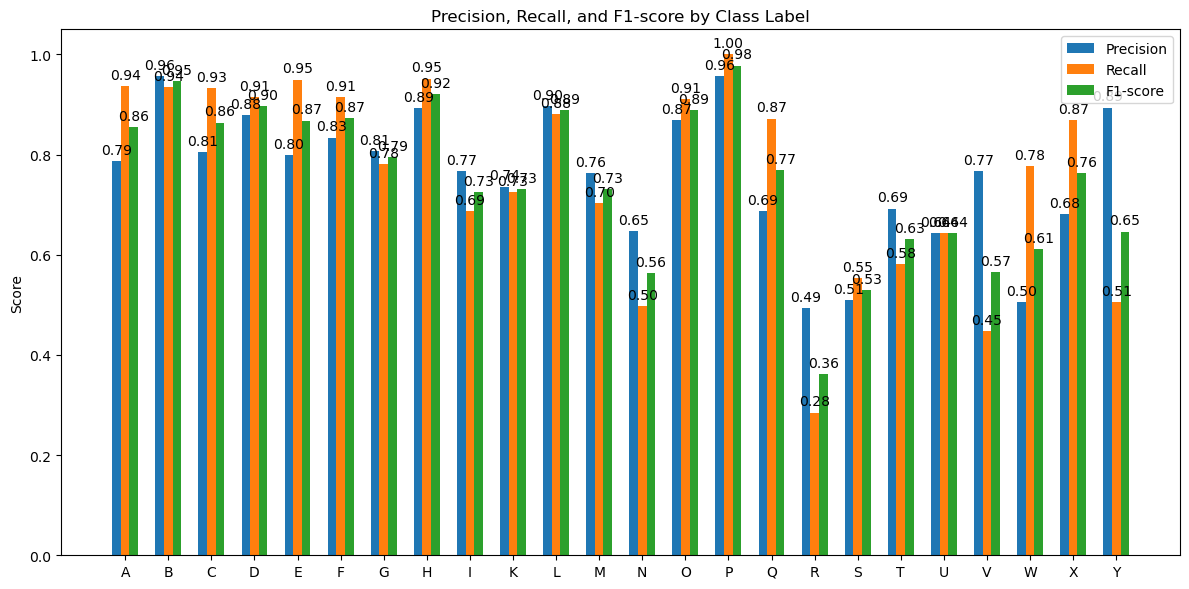

In [40]:
# Create a bar plot to display the results
mapping_letter = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I',
                  10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R',
                  18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y'}
x_labels = [mapping_letter[i] for i in range(25) if i != 9]
x = np.arange(len(x_labels))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1score, width, label='F1-score')

ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-score by Class Label')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


## **Model Building - Sequential Deep Learning Model 3 using GridSearchCV and EarlyStopping**

In [41]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [42]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import time

In [43]:
# Define the model architecture
def create_model():
    model = Sequential()
    model.add(Dense(256, input_shape=(784,), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(24, activation='softmax'))
    # Compile model
    # Using Adam optimizer
    opt = tf.keras.optimizers.Adam(learning_rate=0.00050)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model



In [44]:
# Define the early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Create the KerasClassifier wrapper object for use in scikit-learn
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
batch_size = [64,128]
epochs = [30]

# Define the grid search dictionary
param_grid = dict(batch_size=batch_size, epochs=epochs)

# Create and fit the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_normalized, y_train_encoded, 
                       callbacks=[early_stop], 
                       validation_data=(X_val_normalized, y_val_encoded))

# Print the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.983427 using {'batch_size': 128, 'epochs': 30}
0.981697 (0.007797) with: {'batch_size': 64, 'epochs': 30}
0.983427 (0.001674) with: {'batch_size': 128, 'epochs': 30}


In [45]:
# reload best model
best_model= grid_result.best_estimator_ 

In [46]:
# Train the model

history = best_model.fit(X_train_normalized, y_train_encoded,
                          validation_data=(X_val_normalized, y_val_encoded),
                          callbacks=[early_stop])

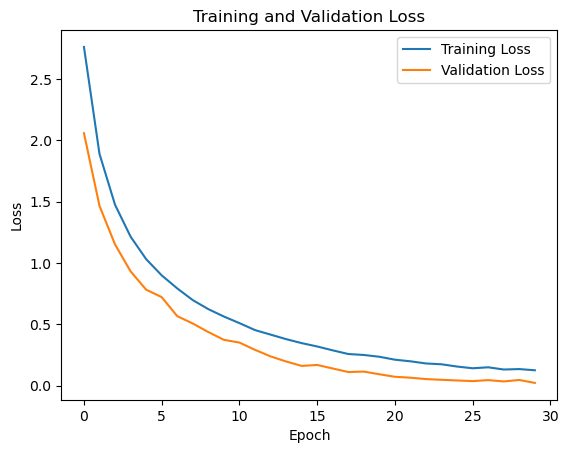

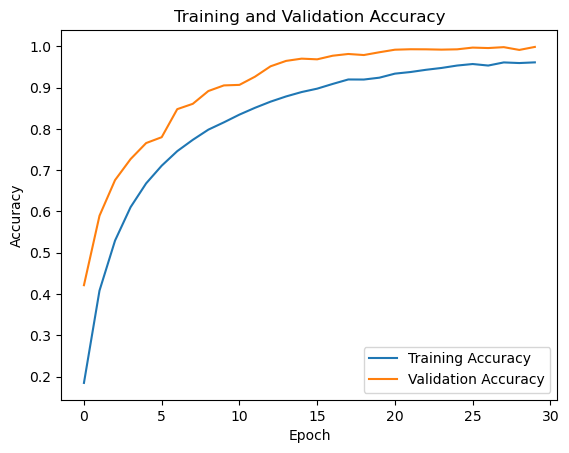

In [47]:
# Plot the learning curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Here,  the training accuracy is higher than the validation accuracy, this may indicate overfitting. This means that the model is memorizing the training data instead of generalizing to new data. In this case, we may need to apply regularization techniques like dropout, reduce the complexity of the model, or collect more data to prevent overfitting, so that it shows better test accuracy.

In [48]:
# Evaluate the model
# Evaluate the model using score() method
test_acc3 = grid_result.score(X_test_normalized, y_test_encoded)
print("Test accuracy:", test_acc3)

Test accuracy: 0.78569436


## **Model Building - Sequential Deep Learning Model 4 using Data Augmentation**

In [49]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [50]:
# Reshape the input data 
X_train_reshaped = X_train_normalized.reshape(-1, 28, 28, 1)
X_val_reshaped= X_val_normalized.reshape(-1, 28, 28, 1)
X_test_reshaped= X_test_normalized.reshape(-1, 28, 28, 1)



In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=False)  # Don't randomly flip images vertically

datagen.fit(X_train_reshaped)


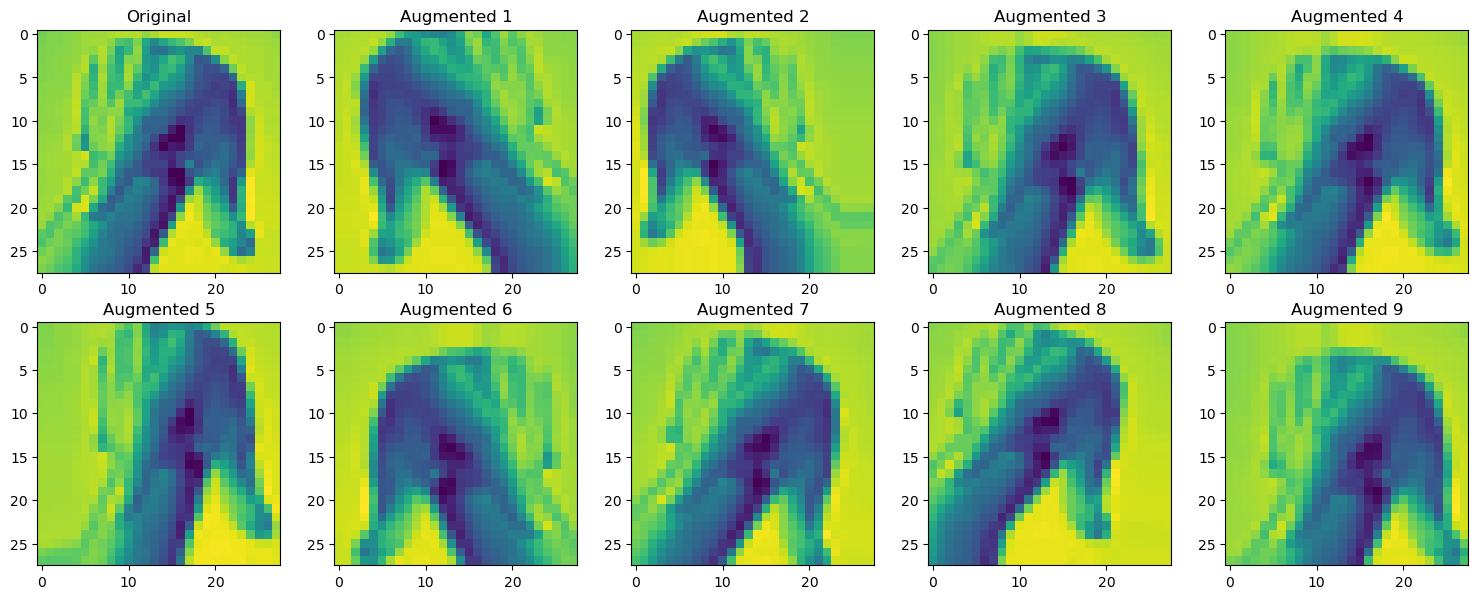

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Choose a random image from the training set
img = X_train_reshaped[np.random.choice(X_train_reshaped.shape[0])]

# Reshape the image to a 4D tensor with shape (1, height, width, channels)
img = img.reshape((1,) + img.shape)

# Generate augmented images using the datagen object
aug_iter = datagen.flow(img)

# Plot the original and augmented images
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
ax = ax.flatten()

# Plot the original image
ax[0].imshow(img[0])
ax[0].set_title("Original")

# Plot the augmented images
for i in range(1, 10):
    augmented_img = next(aug_iter)[0]
    ax[i].imshow(augmented_img)
    ax[i].set_title("Augmented {}".format(i))

plt.tight_layout()
plt.show()


In [53]:
# Define model architecture
seq_model = tf.keras.Sequential([
    layers.Input((28,28,1)),
    Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(24, activation='softmax')
])

# Using Adam optimizer
opt = optimizers.Adam(learning_rate=0.001)

# Compile the model
seq_model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Print the summary of the model
seq_model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                3096      
Total params: 236,952
Trainable params: 236,952
Non-trainable params: 0
__________________________________________________

In [54]:
# Train the model
history = seq_model.fit(datagen.flow(X_train_reshaped, y_train_encoded, batch_size=128), 
                        epochs=30, 
                        validation_data=(X_val_reshaped, y_val_encoded), 
                        verbose=1)


Train for 172 steps, validate on 5491 samples
Epoch 1/30
172/172 [==============================] - 6s 35ms/step - loss: 3.0456 - accuracy: 0.0906 - val_loss: 2.6156 - val_accuracy: 0.2238
Epoch 2/30
172/172 [==============================] - 5s 31ms/step - loss: 2.6420 - accuracy: 0.1713 - val_loss: 2.2291 - val_accuracy: 0.2883
Epoch 3/30
172/172 [==============================] - 5s 31ms/step - loss: 2.4647 - accuracy: 0.2126 - val_loss: 2.0686 - val_accuracy: 0.3438
Epoch 4/30
172/172 [==============================] - 5s 31ms/step - loss: 2.3681 - accuracy: 0.2348 - val_loss: 1.9281 - val_accuracy: 0.3671
Epoch 5/30
172/172 [==============================] - 5s 31ms/step - loss: 2.2858 - accuracy: 0.2623 - val_loss: 1.8108 - val_accuracy: 0.4054
Epoch 6/30
172/172 [==============================] - 6s 32ms/step - loss: 2.2030 - accuracy: 0.2865 - val_loss: 1.7280 - val_accuracy: 0.4486
Epoch 7/30
172/172 [==============================] - 5s 31ms/step - loss: 2.1498 - accuracy: 0.

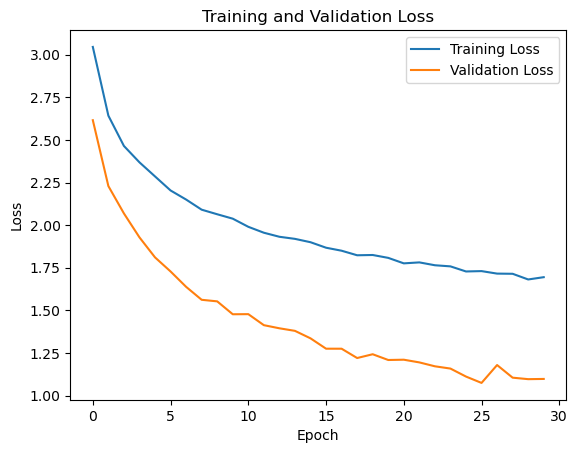

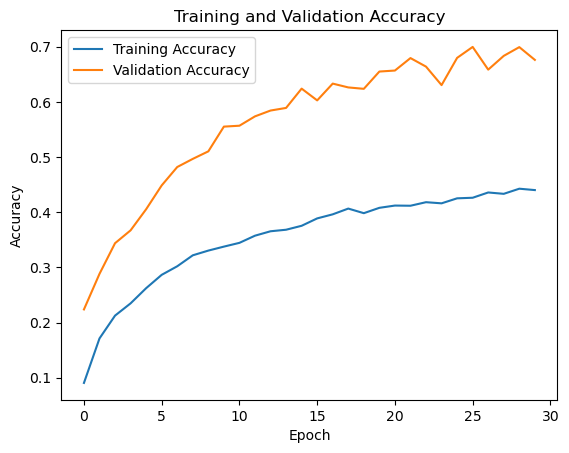

In [55]:
# Plot the learning curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The validation and training accuracy curves have a significant gap between them, but they both improve at a similar rate, this may indicate that the model is learning something useful from the training data. However, it is not generalizing well to new data. In this case, ywe may want to apply regularization techniques like dropout to improve generalization.

In [56]:
# Evaluate the model
test_loss4, test_acc4 = seq_model.evaluate(X_test_reshaped, y_test_encoded, verbose=2)
print('Test accuracy:', test_acc4)

7172/1 - 1s - loss: 1.0377 - accuracy: 0.6057
Test accuracy: 0.6056888


In [57]:
# Here we would get the output as probablities for each category
y_pred= seq_model.predict(X_test_reshaped)

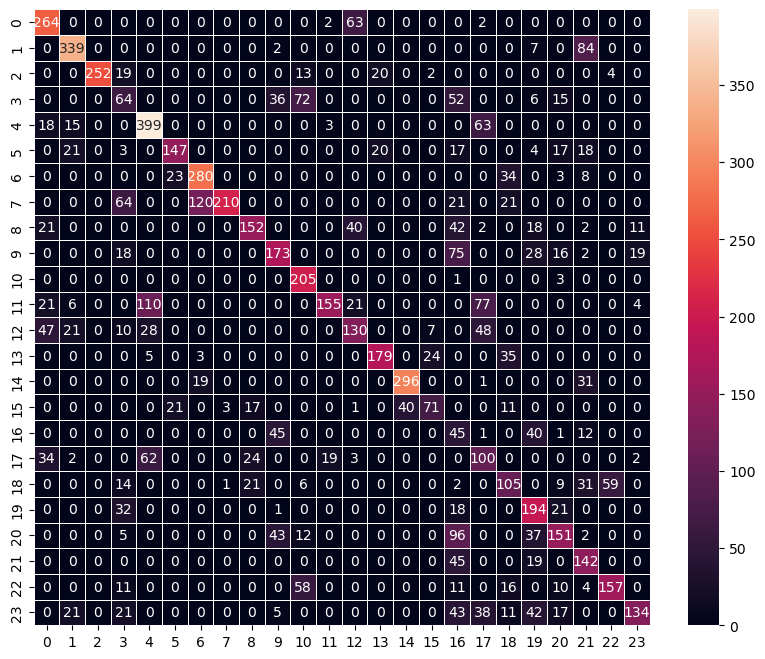

In [58]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## **Model Building - Convolutional Neural Network (CNN) Model 5**

In [59]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [60]:
# Define model architecture

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2), padding='same'),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2), padding='same'),
    Conv2D(512, (3,3), activation='relu'),
    MaxPooling2D((2,2), padding='same'),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='softmax')
])
seq_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                3096      
Total params: 236,952
Trainable params: 236,952
Non-trainable params: 0
__________________________________________________

In [61]:
# Compile the model

# Using Adam optimizer
opt = optimizers.Adam(learning_rate=0.00050)

cnn_model.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])



In [62]:
# Train the model
history = cnn_model.fit(X_train_reshaped, y_train_encoded, batch_size=64, epochs=20, validation_data=(X_val_reshaped, y_val_encoded),verbose=2)



Train on 21964 samples, validate on 5491 samples
Epoch 1/20
21964/21964 - 148s - loss: 1.9228 - accuracy: 0.3914 - val_loss: 0.4039 - val_accuracy: 0.8754
Epoch 2/20
21964/21964 - 153s - loss: 0.3067 - accuracy: 0.8961 - val_loss: 0.0478 - val_accuracy: 0.9927
Epoch 3/20
21964/21964 - 225s - loss: 0.0830 - accuracy: 0.9740 - val_loss: 0.0060 - val_accuracy: 0.9996
Epoch 4/20
21964/21964 - 200s - loss: 0.0374 - accuracy: 0.9896 - val_loss: 0.0024 - val_accuracy: 0.9996
Epoch 5/20
21964/21964 - 148s - loss: 0.0243 - accuracy: 0.9927 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/20
21964/21964 - 149s - loss: 0.0164 - accuracy: 0.9953 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 7/20
21964/21964 - 242s - loss: 0.0177 - accuracy: 0.9948 - val_loss: 6.8311e-04 - val_accuracy: 1.0000
Epoch 8/20
21964/21964 - 147s - loss: 0.0109 - accuracy: 0.9970 - val_loss: 8.9701e-04 - val_accuracy: 1.0000
Epoch 9/20
21964/21964 - 166s - loss: 0.0123 - accuracy: 0.9966 - val_loss: 7.7905e-04 - val_ac

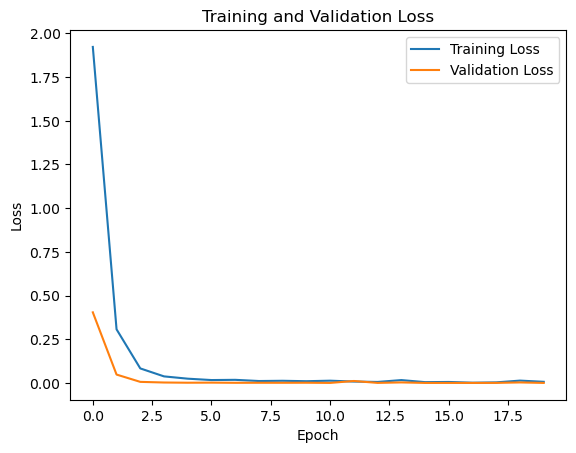

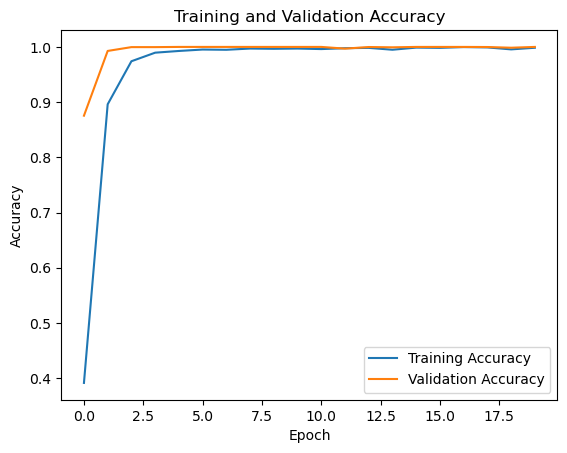

In [63]:
# Plot the learning curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

There is intersection of the loss curve with that of val_loss thus the result is an overfitted model as shown in learning curve above.To avoid overfitting we do dropout, early stopping and data augmentation in the next model to improve accuracy.

In [64]:
# Evaluate the model
test_loss5, test_acc5 = cnn_model.evaluate(X_test_reshaped, y_test_encoded, verbose=2)
print('Test accuracy:', test_acc5)

7172/1 - 17s - loss: 0.0858 - accuracy: 0.9781
Test accuracy: 0.9781093


In [65]:
# Here we would get the output as probablities for each category
y_pred= cnn_model.predict(X_test_reshaped)

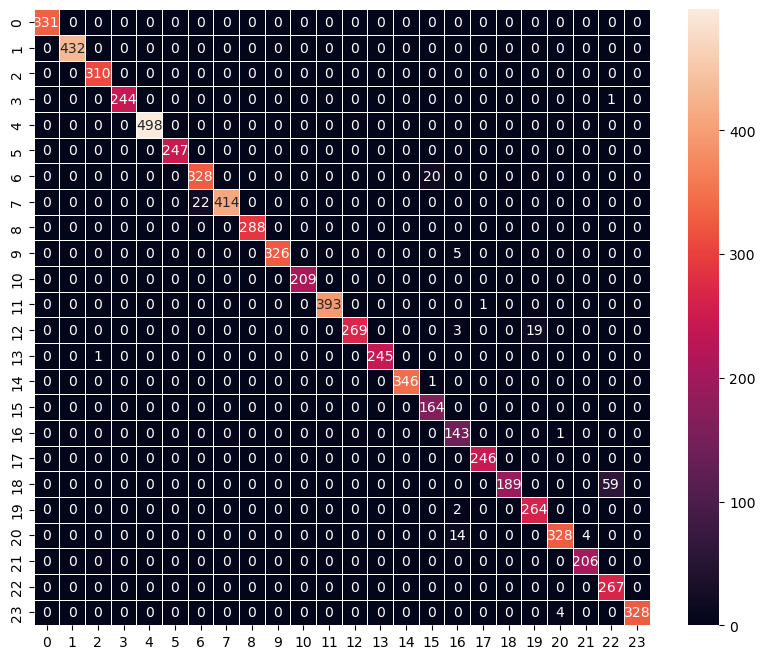

In [66]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## **Model Building - Convolutional Neural Network (CNN) Model 6 using data augmentation**

### **Defining a Convolutional Neural Network (CNN) Model**

Let's create a CNN model sequentially, where we will be adding the layers one after another.

First, we need to clear the previous model's history from the session. 

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's **set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow** to be able to reproduce the same results every time we run the code.

In [67]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [68]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Let's build a **CNN Model**.<br>

The model has 2 main parts:
1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers for prediction.**<br><br>



In [69]:
# Define the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2), padding='same'),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2), padding='same'),
    Conv2D(512, (3,3), activation='relu'),
    MaxPooling2D((2,2), padding='same'),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='softmax')
])

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 512)         590336    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [71]:
# Compile the model

# Using Adam optimizer
opt = optimizers.Adam(learning_rate=0.00050)

model.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])



In [72]:
# Train the model
history = model.fit(datagen.flow(X_train_reshaped, y_train_encoded, batch_size=64), epochs=20, validation_data=(X_val_reshaped, y_val_encoded),verbose=2)



Train for 344 steps, validate on 5491 samples
Epoch 1/20
344/344 - 245s - loss: 2.7171 - accuracy: 0.1553 - val_loss: 1.7269 - val_accuracy: 0.4720
Epoch 2/20
344/344 - 150s - loss: 1.4372 - accuracy: 0.5175 - val_loss: 0.6026 - val_accuracy: 0.7931
Epoch 3/20
344/344 - 154s - loss: 0.8029 - accuracy: 0.7201 - val_loss: 0.3004 - val_accuracy: 0.9026
Epoch 4/20
344/344 - 170s - loss: 0.5021 - accuracy: 0.8222 - val_loss: 0.1639 - val_accuracy: 0.9450
Epoch 5/20
344/344 - 230s - loss: 0.3312 - accuracy: 0.8877 - val_loss: 0.0898 - val_accuracy: 0.9690
Epoch 6/20
344/344 - 150s - loss: 0.2381 - accuracy: 0.9206 - val_loss: 0.0474 - val_accuracy: 0.9863
Epoch 7/20
344/344 - 150s - loss: 0.1804 - accuracy: 0.9406 - val_loss: 0.0234 - val_accuracy: 0.9964
Epoch 8/20
344/344 - 151s - loss: 0.1388 - accuracy: 0.9565 - val_loss: 0.0159 - val_accuracy: 0.9965
Epoch 9/20
344/344 - 201s - loss: 0.1208 - accuracy: 0.9619 - val_loss: 0.0137 - val_accuracy: 0.9962
Epoch 10/20
344/344 - 151s - loss: 0

2023-04-03 22:08:16.523374: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 309 of 344
2023-04-03 22:08:16.624187: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 310 of 344
2023-04-03 22:08:16.633346: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 311 of 344
2023-04-03 22:08:16.642084: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 312 of 344
2023-04-03 22:08:16.650494: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 313 of 344
2023-04-03 22:08:16.659105: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 314 of 344
2023-04-03 22:08:16.667334: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer 

344/344 - 471s - loss: 0.0559 - accuracy: 0.9823 - val_loss: 0.0026 - val_accuracy: 0.9989
Epoch 15/20
344/344 - 308s - loss: 0.0526 - accuracy: 0.9830 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 16/20
344/344 - 150s - loss: 0.0400 - accuracy: 0.9873 - val_loss: 5.5164e-04 - val_accuracy: 1.0000
Epoch 17/20
344/344 - 164s - loss: 0.0434 - accuracy: 0.9875 - val_loss: 0.0094 - val_accuracy: 0.9969
Epoch 18/20
344/344 - 159s - loss: 0.0429 - accuracy: 0.9869 - val_loss: 5.8382e-04 - val_accuracy: 1.0000
Epoch 19/20
344/344 - 150s - loss: 0.0388 - accuracy: 0.9873 - val_loss: 8.3540e-04 - val_accuracy: 1.0000
Epoch 20/20
344/344 - 152s - loss: 0.0316 - accuracy: 0.9904 - val_loss: 4.3892e-04 - val_accuracy: 1.0000


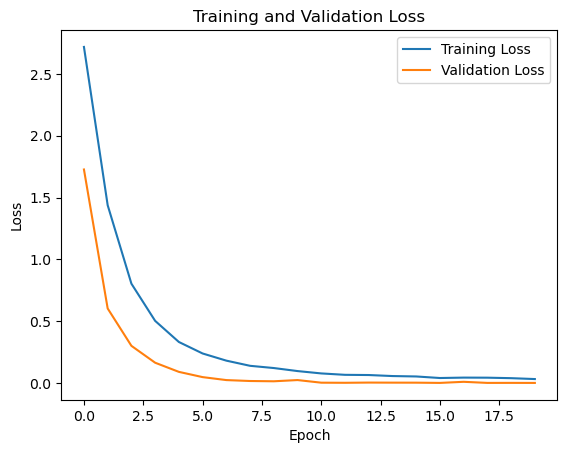

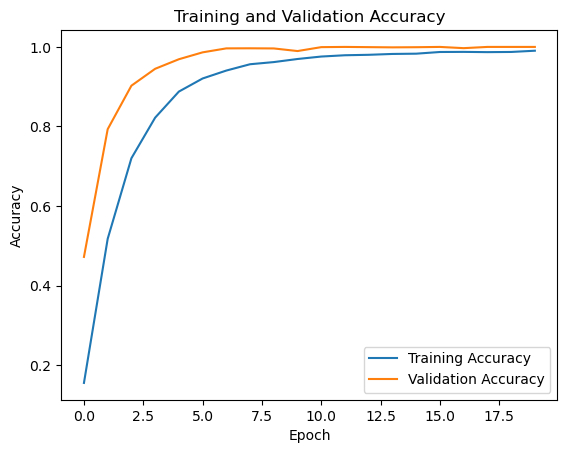

In [73]:
# Plot the learning curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [74]:
# Evaluate the model
test_loss6, test_acc6 = model.evaluate(X_test_reshaped, y_test_encoded, verbose=2)
print('Test accuracy:', test_acc6)

7172/1 - 16s - loss: 0.0024 - accuracy: 0.9972
Test accuracy: 0.9972114


In [75]:
# Here we would get the output as probablities for each category
y_pred= model.predict(X_test_reshaped)

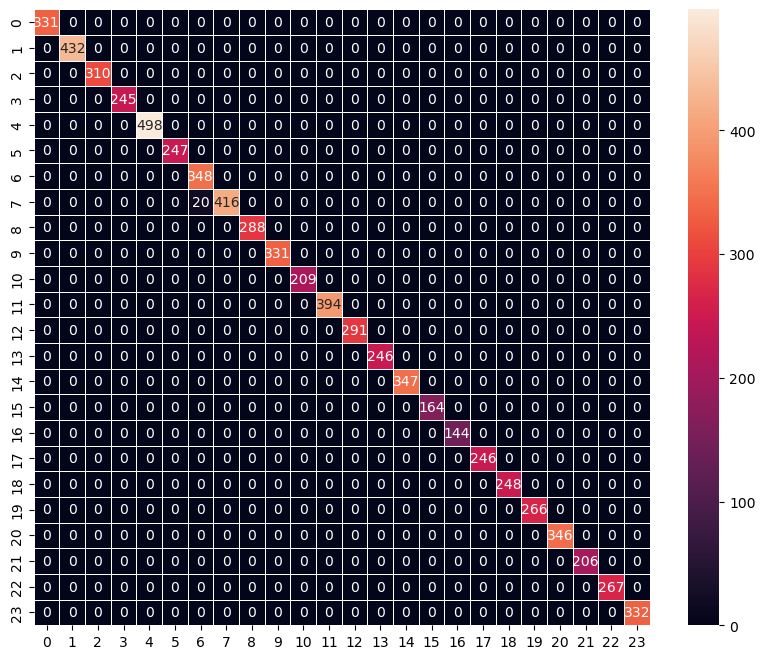

In [76]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## Model Comparison 

In [80]:
# Create a dictionary with the test accuracies
data = {
    'Model': ['CNN with DA Model 6', 'CNN Model 5', 'SQ with DA Model 4', 'SQ with GridSearchCV Model 3', 'SQ with Adam Model 2','SQ with SGD Model 1'],
    'Test Accuracy': [test_acc6, test_acc5, test_acc4, test_acc3, test_acc2, test_acc1]
}

# Create a dataframe from the dictionary
df = pd.DataFrame(data)

# Print the dataframe
display(df)


,Model,Test Accuracy
0,CNN with DA Model 6,0.997211
1,CNN Model 5,0.978109
2,SQ with DA Model 4,0.605689
3,SQ with GridSearchCV Model 3,0.785694
4,SQ with Adam Model 2,0.777747
5,SQ with SGD Model 1,0.744423


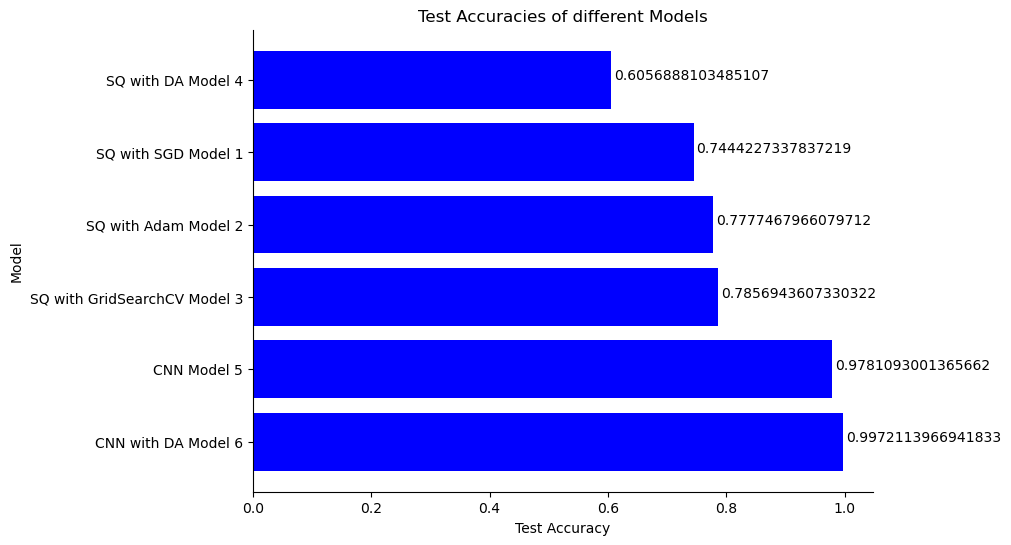

In [83]:

# Sort the dataframe by test accuracy in descending order
df = df.sort_values(by='Test Accuracy', ascending=False)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(df['Model'], df['Test Accuracy'], align='center', color='blue')

# Set the title and axis labels
ax.set_title('Test Accuracies of different Models')
ax.set_xlabel('Test Accuracy')
ax.set_ylabel('Model')

# Display the test accuracy values at the end of each bar
for i, v in enumerate(df['Test Accuracy']):
    ax.text(v + 0.005, i, str(v), color='black', fontsize=10)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()


## Insights

From the given results, we can observe that the CNN model with data augmentation (Model 6) performed the best with a test accuracy of 0.997211, which is significantly better than the other models. This could be attributed to the fact that data augmentation helps to increase the amount and diversity of data available for training, thus reducing overfitting and improving the generalization ability of the model.

On the other hand, the Sequential model with data augmentation (Model 4) gave the worst result with a test accuracy of 0.605689. This could be due to the fact that the architecture of the Sequential model used may not be suitable for handling the increased amount and diversity of data generated through data augmentation.